# Predspracovanie údajov

## Rozumieť údajom

- jedna z najdôležitejších častí

- iba keď máte o vašich dátach predstavu, budete ich vedieť správne spracovať a vyhodnotiť 

### 6 fáz:

- Objavovanie (explore)
- Očistenie (clean)
- Úpravy (mutate)
- Popis (describe)
- Vizualizácia (vizualize)
- Analýza (analyze)

In [1]:
# R
# Load necessary libraries

library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Objavovanie (explore)

Budeme používať dataset U.S. Chronic Disease Indicators (CDI), dostupný na:
- https://catalog.data.gov/dataset/u-s-chronic-disease-indicators-cdi

1. načítanie datasetu - aby sme nemuseli dataset manuálne sťahovať, použijeme vstavané funkcie R pre stiahnutie a načítanie súboru

In [2]:
# URL to download the dataset
dataset_url <- "https://data.cdc.gov/api/views/g4ie-h725/rows.csv?accessType=DOWNLOAD"

# Destination file path
dest_file <- "" # TODO - fill in

# Download the dataset
# download.file(dataset_url, destfile = dest_file)

# Read the CSV file into R
data <- read.csv(dest_file)

2. Zobrazenie základých informácií o datasete

   (Pri dlhých výstupoch je dobré zapnúť posuvný mód - klik pravým tlačidlom myši na Output a výber 'Enable Scrolling for Outputs')

In [3]:
# Glimpse shows variables, variable type and first values
glimpse(data)

Rows: 1,185,676
Columns: 34
$ YearStart                 <int> 2010, 2019, 2019, 2019, 2015, 2020, 2015, 20…
$ YearEnd                   <int> 2010, 2019, 2019, 2019, 2015, 2020, 2015, 20…
$ LocationAbbr              <chr> "OR", "AZ", "OH", "US", "VI", "AL", "DE", "F…
$ LocationDesc              <chr> "Oregon", "Arizona", "Ohio", "United States"…
$ DataSource                <chr> "NVSS", "YRBSS", "YRBSS", "YRBSS", "YRBSS", …
$ Topic                     <chr> "Cardiovascular Disease", "Alcohol", "Alcoho…
$ Question                  <chr> "Mortality from heart failure", "Alcohol use…
$ Response                  <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ DataValueUnit             <chr> "", "%", "%", "%", "%", "%", "%", "%", "%", …
$ DataValueType             <chr> "Number", "Crude Prevalence", "Crude Prevale…
$ DataValue                 <chr> "30", "29.5", "22.5", "13.9", "", "59.1", "5…
$ DataValueAlt              <dbl> 30.0, 29.5, 22.5, 13.9, NA, 59.1, 55.6, 58.1…
$ DataValueF

In [4]:
# View - similar to glimpse, but formatted
# !! doesn't display all the variables, if there are too many
View(data)

YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,⋯,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>
2010,2010,OR,Oregon,NVSS,Cardiovascular Disease,Mortality from heart failure,NA,,Number,⋯,41,CVD,CVD1_4,NMBR,RACE,AIAN,NA,NA,NA,NA
2019,2019,AZ,Arizona,YRBSS,Alcohol,Alcohol use among youth,NA,%,Crude Prevalence,⋯,4,ALC,ALC1_1,CRDPREV,GENDER,GENF,NA,NA,NA,NA
2019,2019,OH,Ohio,YRBSS,Alcohol,Alcohol use among youth,NA,%,Crude Prevalence,⋯,39,ALC,ALC1_1,CRDPREV,GENDER,GENM,NA,NA,NA,NA
2019,2019,US,United States,YRBSS,Alcohol,Alcohol use among youth,NA,%,Crude Prevalence,⋯,59,ALC,ALC1_1,CRDPREV,RACE,ASN,NA,NA,NA,NA
2015,2015,VI,Virgin Islands,YRBSS,Alcohol,Alcohol use among youth,NA,%,Crude Prevalence,⋯,78,ALC,ALC1_1,CRDPREV,GENDER,GENM,NA,NA,NA,NA
2020,2020,AL,Alabama,PRAMS,Alcohol,Alcohol use before pregnancy,NA,%,Crude Prevalence,⋯,1,ALC,ALC1_2,CRDPREV,RACE,WHT,NA,NA,NA,NA
2015,2015,DE,Delaware,PRAMS,Alcohol,Alcohol use before pregnancy,NA,%,Crude Prevalence,⋯,10,ALC,ALC1_2,CRDPREV,OVERALL,OVR,NA,NA,NA,NA
2019,2019,FL,Florida,PRAMS,Alcohol,Alcohol use before pregnancy,NA,%,Crude Prevalence,⋯,12,ALC,ALC1_2,CRDPREV,OVERALL,OVR,NA,NA,NA,NA
2018,2018,KS,Kansas,PRAMS,Alcohol,Alcohol use before pregnancy,NA,%,Crude Prevalence,⋯,20,ALC,ALC1_2,CRDPREV,OVERALL,OVR,NA,NA,NA,NA


3. zobrazenie sumarizácie pre všetky premenné

   - obsahuje základné matematické štatistiky pre numerické premenné
   - obsahuje typ kategorickej premennej
  
   + **jednoduché zistenie zbytočných premenných**

In [5]:
summary(data)

   YearStart       YearEnd     LocationAbbr       LocationDesc      
 Min.   :2001   Min.   :2001   Length:1185676     Length:1185676    
 1st Qu.:2013   1st Qu.:2013   Class :character   Class :character  
 Median :2015   Median :2016   Mode  :character   Mode  :character  
 Mean   :2015   Mean   :2016                                        
 3rd Qu.:2018   3rd Qu.:2018                                        
 Max.   :2021   Max.   :2021                                        
                                                                    
  DataSource           Topic             Question         Response      
 Length:1185676     Length:1185676     Length:1185676     Mode:logical  
 Class :character   Class :character   Class :character   NA's:1185676  
 Mode  :character   Mode  :character   Mode  :character                 
                                                                        
                                                                        
          

4. Zobrazenie prvých a posledných riadkov datasetu

   - overenie, či bol dataset načítaný správne

In [6]:
head(data)
tail(data)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,⋯,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>
1,2010,2010,OR,Oregon,NVSS,Cardiovascular Disease,Mortality from heart failure,NA,,Number,⋯,41,CVD,CVD1_4,NMBR,RACE,AIAN,NA,NA,NA,NA
2,2019,2019,AZ,Arizona,YRBSS,Alcohol,Alcohol use among youth,NA,%,Crude Prevalence,⋯,4,ALC,ALC1_1,CRDPREV,GENDER,GENF,NA,NA,NA,NA
3,2019,2019,OH,Ohio,YRBSS,Alcohol,Alcohol use among youth,NA,%,Crude Prevalence,⋯,39,ALC,ALC1_1,CRDPREV,GENDER,GENM,NA,NA,NA,NA
4,2019,2019,US,United States,YRBSS,Alcohol,Alcohol use among youth,NA,%,Crude Prevalence,⋯,59,ALC,ALC1_1,CRDPREV,RACE,ASN,NA,NA,NA,NA
5,2015,2015,VI,Virgin Islands,YRBSS,Alcohol,Alcohol use among youth,NA,%,Crude Prevalence,⋯,78,ALC,ALC1_1,CRDPREV,GENDER,GENM,NA,NA,NA,NA
6,2020,2020,AL,Alabama,PRAMS,Alcohol,Alcohol use before pregnancy,NA,%,Crude Prevalence,⋯,1,ALC,ALC1_2,CRDPREV,RACE,WHT,NA,NA,NA,NA


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,⋯,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>
1185671,2019,2019,OK,Oklahoma,BRFSS,Arthritis,Activity limitation due to arthritis among adults aged >= 18 years who have doctor-diagnosed arthritis,NA,%,Crude Prevalence,⋯,40,ART,ART2_1,CRDPREV,RACE,OTH,NA,NA,NA,NA
1185672,2020,2020,WY,Wyoming,BRFSS,Diabetes,Dilated eye examination among adults aged >= 18 years with diagnosed diabetes,NA,%,Age-adjusted Prevalence,⋯,56,DIA,DIA7_0,AGEADJPREV,RACE,WHT,NA,NA,NA,NA
1185673,2020,2020,WY,Wyoming,BRFSS,Older Adults,Proportion of older adults aged >= 65 years who are up to date on a core set of clinical preventive services,NA,%,Crude Prevalence,⋯,56,OLD,OLD3_1,CRDPREV,RACE,WHT,NA,NA,NA,NA
1185674,2017,2017,IA,Iowa,BRFSS,Arthritis,Activity limitation due to arthritis among adults aged >= 18 years who have doctor-diagnosed arthritis,NA,%,Age-adjusted Prevalence,⋯,19,ART,ART2_1,AGEADJPREV,RACE,HIS,NA,NA,NA,NA
1185675,2020,2020,WY,Wyoming,BRFSS,Diabetes,Diabetes prevalence among women aged 18-44 years,NA,%,Crude Prevalence,⋯,56,DIA,DIA2_2,CRDPREV,RACE,HIS,NA,NA,NA,NA
1185676,2019,2019,RI,Rhode Island,BRFSS,Arthritis,Activity limitation due to arthritis among adults aged >= 18 years who have doctor-diagnosed arthritis,NA,%,Crude Prevalence,⋯,44,ART,ART2_1,CRDPREV,OVERALL,OVR,NA,NA,NA,NA


5. Zobrazenie názvov premenných

    - užitočné, pri vytváraní tabuliek, grafov, ..

In [7]:
colnames(data)

[1] "YearStart"                 "YearEnd"                  
 [3] "LocationAbbr"              "LocationDesc"             
 [5] "DataSource"                "Topic"                    
 [7] "Question"                  "Response"                 
 [9] "DataValueUnit"             "DataValueType"            
[11] "DataValue"                 "DataValueAlt"             
[13] "DataValueFootnoteSymbol"   "DatavalueFootnote"        
[15] "LowConfidenceLimit"        "HighConfidenceLimit"      
[17] "StratificationCategory1"   "Stratification1"          
[19] "StratificationCategory2"   "Stratification2"          
[21] "StratificationCategory3"   "Stratification3"          
[23] "GeoLocation"               "ResponseID"               
[25] "LocationID"                "TopicID"                  
[27] "QuestionID"                "DataValueTypeID"          
[29] "StratificationCategoryID1" "StratificationID1"        
[31] "StratificationCategoryID2" "StratificationID2"        
[33] "StratificationCategoryID3" "StratificationID3"

##### A. Kategorické premenné

6. Overenie hodnôt v premenných

In [8]:
# there are only NA's
unique(data$Response)
unique(data$StratificationID2)

[1] NA

[1] NA

In [9]:
# there are more values
unique(data$Topic)

[1] "Cardiovascular Disease"                         
 [2] "Alcohol"                                        
 [3] "Arthritis"                                      
 [4] "Asthma"                                         
 [5] "Cancer"                                         
 [6] "Chronic Kidney Disease"                         
 [7] "Chronic Obstructive Pulmonary Disease"          
 [8] "Mental Health"                                  
 [9] "Tobacco"                                        
[10] "Overarching Conditions"                         
[11] "Oral Health"                                    
[12] "Reproductive Health"                            
[13] "Diabetes"                                       
[14] "Immunization"                                   
[15] "Nutrition, Physical Activity, and Weight Status"
[16] "Disability"                                     
[17] "Older Adults"

7. Vytvorenie tabuľky

   - počet záznamov v datasete pre danú hodnotu premennej

In [10]:
table(data$LocationDesc)


             Alabama               Alaska              Arizona 
               22058                22157                22271 
            Arkansas           California             Colorado 
               22384                22037                22417 
         Connecticut             Delaware District of Columbia 
               22082                22151                21936 
             Florida              Georgia                 Guam 
               22311                21980                14009 
              Hawaii                Idaho             Illinois 
               22420                21842                22157 
             Indiana                 Iowa               Kansas 
               21872                22510                21988 
            Kentucky            Louisiana                Maine 
               22375                22053                22142 
            Maryland        Massachusetts             Michigan 
               22346                223

8. Triedenie tabuľky

    - predvolene triedená podľa hodnôt premennej podľa abecedy
    - utrieďte tabuľku tak, aby na začiatku tabuľky boli štáty ktoré majú v datasete najviac záznamov  
    - funkcia sort() - www.rdocumentation.org/packages/base/versions/3.6.2/topics/sort


In [11]:
# TODO - sort the table

9. Grafické zobrazenie počtu hodnôt

    - vytvorte čiarový graf, ktorý vám zobrazí počet záznamov pre jednotlivé kategórie (premenná Topics) v datasete  
    - funkcia barplot() - www.rdocumentation.org/packages/graphics/versions/3.6.2/topics/barplot
    - ďalšie formátovanie - www.r-graph-gallery.com/210-custom-barplot-layout.html  

In [12]:
# Settings for plot visualisation
options(repr.plot.height = 5, repr.plot.res = 200)

# TODO - create barplot from the previously sorted table (default = vertical)

# TODO - set the labels' orientation to perpendicular (find 'las' attribute in the advanced formatting link)

# Increase margin size to fit
# par(mar=c(20,5,1,1)) # vertical

# TODO - change the barplot to horizontal (find 'horiz' attribute in the advanced formatting link)

# par(mar=c(5,20,1,1)) # horizontal


   
##### B. Numerické premenné

10. Zobrazenie matematických vlastností
    
    - variancia (variance): priemerná kvadratická odchýlka od priemeru
    - smerodajná odchýlka (standard deviation): druhá odmocnina variancie
    - horný/dolný kvartil (quartile): hodnota, od ktorej je 25%, resp. 75% hodnôt menších
    - medián (median) - rozdeľuje súbor údajov na dve rovnaké polovice (polovica údajov je pred ním, polovica za ním)
    - priemer (mean) - súčet všetkých hodnôt delený počtom hodnôt, ovplyvnený extrémnymi hodnotami
    - NA - prázdne hodnoty

Možnosť použiť ďalšie funkcie ako sd(), var(), boxplot.stats() a pod.

In [13]:
# summary shows min, max, 1.st and 3.rd Quartile, Median, Mean and NA's
summary(data$DataValueAlt)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
      0.0      16.1      40.0    1005.3      76.0 2925456.0    381098 

11. Zobrazenie chýbajúcich hodnôt v datasete
    - chýbajúce hodnoty - NA - www.rdocumentation.org/packages/base/versions/3.6.2/topics/NA

In [14]:
# see data in variable
data$LowConfidenceLimit

# is.na - function that returns logical value, whether the value is NA or not
is.na(data$LowConfidenceLimit)

[1]      NA   24.90   17.00   10.40      NA   53.90   52.30   54.20   58.50
   [10]      NA   34.70   56.30   63.80      NA   66.50   66.80   19.50      NA
   [19]      NA      NA      NA      NA      NA      NA   27.90   13.60   18.90
   [28]      NA      NA      NA      NA      NA      NA   12.50      NA    6.70
   [37]      NA      NA    9.20      NA      NA      NA      NA      NA   10.50
   [46]      NA      NA      NA      NA      NA      NA      NA      NA      NA
   [55]      NA    7.80      NA      NA      NA      NA      NA      NA      NA
   [64]   13.70      NA      NA   13.60      NA      NA      NA      NA      NA
   [73]      NA      NA      NA      NA      NA   16.10      NA      NA      NA
   [82]      NA      NA      NA   16.50      NA      NA      NA      NA      NA
   [91]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [100]      NA      NA   28.00      NA      NA  109.40    7.20   28.90      NA
  [109]      NA      NA      NA      NA      NA      NA      NA      NA    6.90
  [118]      NA      NA      NA      NA   34.15      NA      NA      NA      NA
  [127]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [136]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [145]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [154]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [163]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [172]      NA      NA      NA   10.50      NA      NA      NA      NA      NA
  [181]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [190]      NA    8.50      NA      NA      NA      NA      NA      NA      NA
  [199]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [208]      NA      NA      NA    6.50      NA      NA      NA      NA      NA
  [217]    6.40      NA      NA    7.00      NA      NA      NA      NA      NA
  [226]    6.60      NA      NA      NA   12.90      NA      NA    9.40      NA
  [235]      NA      NA      NA      NA    8.30      NA      NA      NA      NA
  [244]      NA      NA      NA   10.60      NA      NA      NA      NA      NA
  [253]      NA      NA      NA    8.00    8.90    7.00      NA    7.20      NA
  [262]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [271]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [280]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [289]      NA      NA    1.80      NA      NA      NA      NA      NA      NA
  [298]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [307]      NA      NA      NA  129.30      NA  115.60      NA      NA      NA
  [316]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [325]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [334]      NA      NA      NA      NA      NA      NA      NA    6.80      NA
  [343]    2.80      NA      NA      NA      NA   19.00   18.70      NA      NA
  [352]      NA      NA      NA      NA   21.20   20.50   21.00   22.00   23.10
  [361]      NA      NA      NA   19.10      NA      NA      NA      NA      NA
  [370]      NA      NA   17.70   19.20      NA      NA      NA      NA      NA
  [379]      NA      NA      NA      NA      NA      NA      NA      NA  515.30
  [388]      NA      NA  636.60      NA      NA      NA  599.50      NA      NA
  [397]      NA      NA      NA      NA      NA  515.30      NA      NA      NA
  [406]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [415]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [424]      NA      NA      NA      NA      NA      NA      NA      NA  606.60
  [433]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [442]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [4

[1]  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
   [13] FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
   [25] FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE
   [37]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
   [49]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
   [61]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
   [73]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
   [85] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
   [97]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE
  [109]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
  [121]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [133]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [145]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [157]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [169]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
  [181]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
  [193]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [205]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
  [217] FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
  [229]  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
  [241]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
  [253]  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
  [265]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [277]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [289]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [301]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE
  [313]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [325]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [337]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE
  [349] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE
  [361]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
  [373] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [385]  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
  [397]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [409]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [421]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
  [433]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [445]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE
  [457]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE
  [469] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [481]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
  [493]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
  [505]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [517]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
  [529] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [541]  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
  [553] FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
  [565]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [577] FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
  [589]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [6

In [15]:
# display all the variables of all the data, where LowConfidenceLimit is NA
data[is.na(data$LowConfidenceLimit),] 

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,⋯,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>
1,2010,2010,OR,Oregon,NVSS,Cardiovascular Disease,Mortality from heart failure,NA,,Number,⋯,41,CVD,CVD1_4,NMBR,RACE,AIAN,NA,NA,NA,NA
5,2015,2015,VI,Virgin Islands,YRBSS,Alcohol,Alcohol use among youth,NA,%,Crude Prevalence,⋯,78,ALC,ALC1_1,CRDPREV,GENDER,GENM,NA,NA,NA,NA
10,2013,2013,MS,Mississippi,PRAMS,Alcohol,Alcohol use before pregnancy,NA,%,Crude Prevalence,⋯,28,ALC,ALC1_2,CRDPREV,OVERALL,OVR,NA,NA,NA,NA
14,2011,2011,US,United States,PRAMS,Alcohol,Alcohol use before pregnancy,NA,%,Crude Prevalence,⋯,59,ALC,ALC1_2,CRDPREV,OVERALL,OVR,NA,NA,NA,NA
18,2011,2011,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,NA,,Number,⋯,2,ALC,ALC6_0,NMBR,OVERALL,OVR,NA,NA,NA,NA
19,2016,2016,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,NA,,Number,⋯,2,ALC,ALC6_0,NMBR,GENDER,GENM,NA,NA,NA,NA
20,2019,2019,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,NA,,Number,⋯,2,ALC,ALC6_0,NMBR,OVERALL,OVR,NA,NA,NA,NA
21,2016,2016,AL,Alabama,NVSS,Alcohol,Chronic liver disease mortality,NA,,Number,⋯,1,ALC,ALC6_0,NMBR,RACE,BLK,NA,NA,NA,NA
22,2012,2012,AR,Arkansas,NVSS,Alcohol,Chronic liver disease mortality,NA,,Number,⋯,5,ALC,ALC6_0,NMBR,GENDER,GENM,NA,NA,NA,NA


## Očistenie (clean)

Očistenie údajov zahŕňa: 
- overenie/úpravu typov premenných
- výber podstatných premenných
- filtrovanie hodnôt, podľa toho čo chceme ďalej spracovávať
- odstránenie NA a duplicitných údajov

1. Overenie a zmena typu premennej
    - pri kategorických premenných je dobré zmeniť typ premennej z 'character' na 'factor', pretože pri niektorých štatistických testoch (napr. ANOVA) sa môže stať, že  táto premenná nebude vyhodnocovaná ako kateogrická, čo ovplyvní typ a výsledok použitého testu
  
    - as.factor - www.rdocumentation.org/packages/h2o/versions/3.42.0.2/topics/as.factor


In [16]:
# class function shows the variable type
class(data$Topic)

[1] "character"

In [17]:
# change categorical variable types to factor
data$LocationAbbr <- as.factor(data$LocationAbbr)
data$LocationDesc <- as.factor(data$LocationDesc)
data$DataSource <- as.factor(data$DataSource)
data$Topic <- as.factor(data$Topic)
data$TopicID <- as.factor(data$TopicID)
data$Question <- as.factor(data$Question)
data$QuestionID <- as.factor(data$QuestionID)
data$StratificationCategory1 <- as.factor(data$StratificationCategory1)
data$DataValueType <- as.factor(data$DataValueType)

2. Overenie hodnôt premennej (špecifické pre premenné typu factor)

   - rozdiel unique/factor - unique vracia unikátne hodnoty prítomné vo vzorke, factor vracia všetky hodnoty, ktoré má premenná definované a môže ich nadobúdať (niečo ako výber hodnoty z dropdownu)

In [18]:
levels(data$StratificationCategory1)

[1] "Gender"         "Overall"        "Race/Ethnicity"

3. Výber podstatných premenných

   - redukcia datasetu - len premenné ktoré nás zaujímajú/majú pre nás nejakú hodnotu
   - funkcia select - https://dplyr.tidyverse.org/reference/select.html
   - pre opakujúce sa názvy použite funkciu starts_with - https://www.rdocumentation.org/packages/tidyselect/versions/1.2.0/topics/starts_with

**ktoré premenné na základe doterajších znalostí môžeme vynechať?**

In [19]:
# %>% in R means redirecting the output to some function, similar to >> in bash
 #TODO

YearStart,YearEnd,LocationAbbr,LocationDesc,LocationID,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueTypeID,⋯,TopicID,Topic,QuestionID,Question,LowConfidenceLimit,HighConfidenceLimit,StratificationCategoryID1,StratificationID1,StratificationCategory1,Stratification1
<int>,<int>,<fct>,<fct>,<int>,<chr>,<fct>,<chr>,<dbl>,<chr>,⋯,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<chr>
2010,2010,OR,Oregon,41,,Number,30,30.0,NMBR,⋯,CVD,Cardiovascular Disease,CVD1_4,Mortality from heart failure,NA,NA,RACE,AIAN,Race/Ethnicity,American Indian or Alaska Native
2019,2019,AZ,Arizona,4,%,Crude Prevalence,29.5,29.5,CRDPREV,⋯,ALC,Alcohol,ALC1_1,Alcohol use among youth,24.9,34.7,GENDER,GENF,Gender,Female
2019,2019,OH,Ohio,39,%,Crude Prevalence,22.5,22.5,CRDPREV,⋯,ALC,Alcohol,ALC1_1,Alcohol use among youth,17.0,29.1,GENDER,GENM,Gender,Male
2019,2019,US,United States,59,%,Crude Prevalence,13.9,13.9,CRDPREV,⋯,ALC,Alcohol,ALC1_1,Alcohol use among youth,10.4,18.4,RACE,ASN,Race/Ethnicity,"Asian, non-Hispanic"
2015,2015,VI,Virgin Islands,78,%,Crude Prevalence,,NA,CRDPREV,⋯,ALC,Alcohol,ALC1_1,Alcohol use among youth,NA,NA,GENDER,GENM,Gender,Male
2020,2020,AL,Alabama,1,%,Crude Prevalence,59.1,59.1,CRDPREV,⋯,ALC,Alcohol,ALC1_2,Alcohol use before pregnancy,53.9,64.0,RACE,WHT,Race/Ethnicity,"White, non-Hispanic"
2015,2015,DE,Delaware,10,%,Crude Prevalence,55.6,55.6,CRDPREV,⋯,ALC,Alcohol,ALC1_2,Alcohol use before pregnancy,52.3,58.9,OVERALL,OVR,Overall,Overall
2019,2019,FL,Florida,12,%,Crude Prevalence,58.1,58.1,CRDPREV,⋯,ALC,Alcohol,ALC1_2,Alcohol use before pregnancy,54.2,61.8,OVERALL,OVR,Overall,Overall
2018,2018,KS,Kansas,20,%,Crude Prevalence,62.6,62.6,CRDPREV,⋯,ALC,Alcohol,ALC1_2,Alcohol use before pregnancy,58.5,66.6,OVERALL,OVR,Overall,Overall


V premennej DataValueUnit sa v niektorých záznamoch nachádzajú prázdne hodnoty. 

Malo by význam ich vyfiltrovať ? 

Ak áno tak kedy ?

4. Výber záznamov s ktorými chceme pracovať

   - napríklad chceme pracovať len s otázkami ktoré sa týkajú cukrovky (TopicID = 'DIA') a boli zaznamenané od roku 2015.
   - doplňte predošlý výber údajov o filtrovanie tak, že výstup z funkcie select presmerujete do ďalšej funkcie, kde vyfiltrujete údaje
   - použite funkciu filter - https://dplyr.tidyverse.org/articles/grouping.html?q=filter#filter
   - pre porovnávanie faktorov/stringov môžete použiť %in% operator - NázovPremennej %in% "HodnotaPremennej"
   - operátory v R - https://www.statmethods.net/management/operators.html
   - priraďte output do premennej `data_chosen`

In [20]:
# TODO
# use function filter(condition1 & condition2)

data_chosen <- data %>% 
    select(YearStart, YearEnd, starts_with("Location"), DataSource, TopicID, Topic, QuestionID, Question, starts_with("DataValue"), LowConfidenceLimit,
           HighConfidenceLimit, StratificationCategoryID1, StratificationID1, StratificationCategory1, Stratification1,
           -DatavalueFootnote, -DataValueFootnoteSymbol) %>%
    filter(TopicID %in% "DIA" & YearStart > 2015)

5. Odstránenie chýbajúcich hodnôt

    - dôležité najmä pre numerické premenné - použitie matematických funkcií 

In [21]:
# numeric variable with non-numeric datatype
mean(data_chosen$DataValue)

Warning message in mean.default(data_chosen$DataValue):
"argument is not numeric or logical: returning NA"


[1] NA

In [22]:
# numeric variable with numeric datatype but also NA's
mean(data_chosen$DataValueAlt)

[1] NA

In [23]:
# numeric variable with numeric datatype but also NA's
mean(data_chosen$DataValueAlt, na.rm = TRUE)

[1] 851.3212

6. Zobrazenie nekompletných hodnôt

In [24]:
# the dot passes the input of the filter function as an input to the complete.cases function
data_chosen %>% 
    filter(!complete.cases(.))

YearStart,YearEnd,LocationAbbr,LocationDesc,LocationID,DataSource,TopicID,Topic,QuestionID,Question,⋯,DataValueType,DataValue,DataValueAlt,DataValueTypeID,LowConfidenceLimit,HighConfidenceLimit,StratificationCategoryID1,StratificationID1,StratificationCategory1,Stratification1
<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<chr>
2019,2019,NV,Nevada,32,BRFSS,DIA,Diabetes,DIA5_0,Foot examination among adults aged >= 18 years with diagnosed diabetes,⋯,Crude Prevalence,,NA,CRDPREV,NA,NA,GENDER,GENM,Gender,Male
2018,2018,NV,Nevada,32,BRFSS,DIA,Diabetes,DIA7_0,Dilated eye examination among adults aged >= 18 years with diagnosed diabetes,⋯,Age-adjusted Prevalence,,NA,AGEADJPREV,NA,NA,GENDER,GENM,Gender,Male
2018,2018,NV,Nevada,32,BRFSS,DIA,Diabetes,DIA5_0,Foot examination among adults aged >= 18 years with diagnosed diabetes,⋯,Crude Prevalence,,NA,CRDPREV,NA,NA,RACE,HIS,Race/Ethnicity,Hispanic
2018,2018,NY,New York,36,BRFSS,DIA,Diabetes,DIA5_0,Foot examination among adults aged >= 18 years with diagnosed diabetes,⋯,Age-adjusted Prevalence,,NA,AGEADJPREV,NA,NA,GENDER,GENM,Gender,Male
2018,2018,AK,Alaska,2,NVSS,DIA,Diabetes,DIA1_1,Mortality due to diabetes reported as any listed cause of death,⋯,Number,20,20,NMBR,NA,NA,RACE,API,Race/Ethnicity,Asian or Pacific Islander
2016,2016,AR,Arkansas,5,NVSS,DIA,Diabetes,DIA1_1,Mortality due to diabetes reported as any listed cause of death,⋯,Number,1505,1505,NMBR,NA,NA,GENDER,GENM,Gender,Male
2017,2017,AR,Arkansas,5,NVSS,DIA,Diabetes,DIA1_1,Mortality due to diabetes reported as any listed cause of death,⋯,Number,33,33,NMBR,NA,NA,RACE,HIS,Race/Ethnicity,Hispanic
2016,2016,DC,District of Columbia,11,NVSS,DIA,Diabetes,DIA1_1,Mortality due to diabetes reported as any listed cause of death,⋯,Number,477,477,NMBR,NA,NA,OVERALL,OVR,Overall,Overall
2020,2020,HI,Hawaii,15,NVSS,DIA,Diabetes,DIA1_1,Mortality due to diabetes reported as any listed cause of death,⋯,Number,528,528,NMBR,NA,NA,GENDER,GENF,Gender,Female


Vymazanie záznamov, ktoré majú v stĺpci DataValueAlt hodnotu NA

In [25]:
data_filtered <- data_chosen %>% 
    drop_na(DataValueAlt)

data_filtered

YearStart,YearEnd,LocationAbbr,LocationDesc,LocationID,DataSource,TopicID,Topic,QuestionID,Question,⋯,DataValueType,DataValue,DataValueAlt,DataValueTypeID,LowConfidenceLimit,HighConfidenceLimit,StratificationCategoryID1,StratificationID1,StratificationCategory1,Stratification1
<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<chr>
2016,2016,NV,Nevada,32,BRFSS,DIA,Diabetes,DIA8_0,Visits to dentist or dental clinic among adults aged >= 18 years with diagnosed diabetes,⋯,Crude Prevalence,57.8,57.8,CRDPREV,49.2,66.0,GENDER,GENM,Gender,Male
2019,2019,NV,Nevada,32,BRFSS,DIA,Diabetes,DIA2_1,Prevalence of diagnosed diabetes among adults aged >= 18 years,⋯,Crude Prevalence,11.2,11.2,CRDPREV,9.0,13.9,GENDER,GENM,Gender,Male
2017,2017,NE,Nebraska,31,BRFSS,DIA,Diabetes,DIA11_1,Prevalence of high cholesterol among adults aged >= 18 years with diagnosed diabetes,⋯,Crude Prevalence,56.9,56.9,CRDPREV,53.4,60.4,OVERALL,OVR,Overall,Overall
2018,2018,NE,Nebraska,31,BRFSS,DIA,Diabetes,DIA12_1,Influenza vaccination among noninstitutionalized adults aged 18-64 years with diagnosed diabetes,⋯,Age-adjusted Prevalence,43.0,43.0,AGEADJPREV,33.0,53.6,GENDER,GENF,Gender,Female
2016,2016,NE,Nebraska,31,BRFSS,DIA,Diabetes,DIA13_1,Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with diagnosed diabetes,⋯,Age-adjusted Prevalence,37.8,37.8,AGEADJPREV,31.0,45.2,OVERALL,OVR,Overall,Overall
2018,2018,NE,Nebraska,31,BRFSS,DIA,Diabetes,DIA11_3,Prevalence of depressive disorders among adults aged >= 18 years with diagnosed diabetes,⋯,Crude Prevalence,17.9,17.9,CRDPREV,14.2,22.4,GENDER,GENM,Gender,Male
2020,2020,NE,Nebraska,31,BRFSS,DIA,Diabetes,DIA12_1,Influenza vaccination among noninstitutionalized adults aged 18-64 years with diagnosed diabetes,⋯,Crude Prevalence,60.9,60.9,CRDPREV,53.0,68.4,GENDER,GENF,Gender,Female
2019,2019,NE,Nebraska,31,BRFSS,DIA,Diabetes,DIA2_1,Prevalence of diagnosed diabetes among adults aged >= 18 years,⋯,Crude Prevalence,15.7,15.7,CRDPREV,11.6,20.8,RACE,BLK,Race/Ethnicity,"Black, non-Hispanic"
2016,2016,NV,Nevada,32,BRFSS,DIA,Diabetes,DIA2_1,Prevalence of diagnosed diabetes among adults aged >= 18 years,⋯,Crude Prevalence,10.7,10.7,CRDPREV,9.1,12.6,GENDER,GENM,Gender,Male


Overenie, či dataset obsahuje ešte nejaké NA hodnoty:

In [26]:
# TODO

7. Odstránenie duplicitných hodnôt
    
    - funkcia distinct - https://www.rdocumentation.org/packages/dplyr/versions/1.0.10/topics/distinct

In [27]:
data_clean <- data_filtered %>% 
    distinct()

## Úpravy (mutate)

- ak z nejakých dôvodov potrebujeme urobiť zmeny premenných
    - prekódovanie premennej
    - zmena názvu premennej
    - vytvorenie pivotovej tabuľky a pod.

1. Prekódovanie hodnôt

   - napr. ak chceme niektorú z kategorických premenných označiť číselným kódovaním, prípadne zmeniť ich poradie, atď.

In [28]:
unique(data_clean$Stratification1)
unique(data_clean$StratificationID1)

[1] "Male"                             "Overall"                         
 [3] "Female"                           "Black, non-Hispanic"             
 [5] "Asian or Pacific Islander"        "Hispanic"                        
 [7] "White, non-Hispanic"              "American Indian or Alaska Native"
 [9] "Multiracial, non-Hispanic"        "Other, non-Hispanic"

[1] "GENM" "OVR"  "GENF" "BLK"  "API"  "HIS"  "WHT"  "AIAN" "MRC"  "OTH"

Aký dátový typ má premenná `Stratification1` ?

In [29]:
# TODO

Aky typ musí mať aby bola kategorická?

Zmeňte typ premennej `StratificationID1` na kategorický a nastavte poradie hodnôt v tejto premennej.

- Použite funkciu factor - https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/factor

In [30]:
# TODO
# variable <- factor(variable, levels = c( ... (values) )

Vytvorte v datasete `data_clean` novú premennú s názvom `Stratification1ID_code`, ktorá bude obsahovať zakódované hodnoty premennej  `Stratification1ID` vo forme celých čísel.
- Použite funkciu as.integer - https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/integer

In [31]:
# TODO

2. Zmena názvu premennej
- funkcia rename - https://dplyr.tidyverse.org/reference/rename.html

In [32]:
data_clean <- data_clean %>%
    rename("DataValueNum" = "DataValueAlt")  # target = source

3. Vytvorenie kontingenčnej tabuľky (pivot table)

   - vzájomný vzťah dvoch premenných
   - stĺpce ukazujú hodnoty jednej premennej, riadky druhej premennej
   - hodnoty v tabuľke ukazujú agregované hodnoty - počet, maximum, minimum, priemer, ..
  
Na vytvorenie sa môže použiť funkcia pivot_wider alebo pivot_longer

In [33]:
# select specific data for pivot table only
data_pivot <- select(data_clean, YearStart, LocationAbbr, DataValueNum) 

# pivot table in wider format where columns are YearStart values, 
# rows are LocationAbbr and values are the mean of DataValueAlt
pivot_table <- data_pivot %>%
    pivot_wider(names_from = YearStart, 
                values_from = DataValueNum, 
                values_fn = list(DataValueNum = mean))

pivot_table

LocationAbbr,2016,2019,2017,2018,2020,2021
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NV,1370.40013,103.89910,1025.68783,1458.23407,133.79029,43.08082
NE,733.30983,91.51718,842.90309,742.23059,137.26381,52.29328
AK,56.97308,56.89746,227.28461,279.12828,64.52963,49.32185
AR,1506.90331,124.59244,125.13947,1737.17914,161.10901,53.45246
DC,332.76376,65.80965,189.18975,348.40379,79.99587,50.06263
HI,71.34425,71.40952,72.83884,90.83492,80.80667,47.96214
IA,1650.39870,127.11929,1228.44966,1313.61694,193.60309,54.58898
ID,91.67403,98.11789,95.78391,130.55612,115.77340,45.57403
IN,204.64821,176.13416,194.93078,328.74831,217.92270,52.63960


## Popis (describe)

- popis intervalu, v ktorom sa údaje nachádzajú
- ich sústredenie (centralizovanie) okolo stredu
- rozptyl
- sumarizácia
- vytvorenie tabuliek

1. Popis matematických vlastností

In [34]:
min(data_clean$DataValueNum)
max(data_clean$DataValueNum)

# max - min
range(data_clean$DataValueNum)

# interquartile range
IQR(data_clean$DataValueNum)

mean(data_clean$DataValueNum, na.rm = TRUE)
median(data_clean$DataValueNum)

var(data_clean$DataValueNum)

[1] 0

[1] 664858

[1]      0 664858

[1] 43.4

[1] 851.3212

[1] 57

[1] 122542211

2. Vytvorenie tabuľky s použitím sumarizácie

   - zoskupovanie údajov - funkcia group_by - https://dplyr.tidyverse.org/reference/group_by.html
   - funkcia summarise - https://dplyr.tidyverse.org/reference/summarise.html

In [35]:
data_clean %>%
    group_by(LocationAbbr) %>%
    summarise(MinValue = min(DataValueNum), 
              MaxValue = max(DataValueNum), 
              Mean = mean(DataValueNum),
              SD = sd(DataValueNum))

LocationAbbr,MinValue,MaxValue,Mean,SD
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
AK,1.10,10023.0,138.12969,695.18070
AL,1.70,4651.0,120.50919,402.78541
AR,1.40,78709.0,705.70446,5520.65667
AZ,0.90,155226.0,1386.49411,10622.55966
CA,0.70,45249.0,747.63467,3754.22499
CO,0.80,79816.0,927.34162,6284.43702
CT,0.90,2996.0,94.18159,276.90967
DC,0.00,18369.0,199.15257,1193.83674
DE,1.90,20628.0,144.54773,1010.28148


## Vizualizácia (vizualize)

- grafy pre jednoduché pochopenie údajov
- oddelenie kategorickej závislej premennej v priestore nezávislých premenných
    - napr. farebné oddelenie chorých/zdravých pacientov v grafe priemerných hodnôt krvného tlaku a veku
 
+ najpoužívanejšia knižnica - ggplot2 - https://ggplot2.tidyverse.org/

1. Stĺpcový graf Výskytu cukrovky podľa lokality

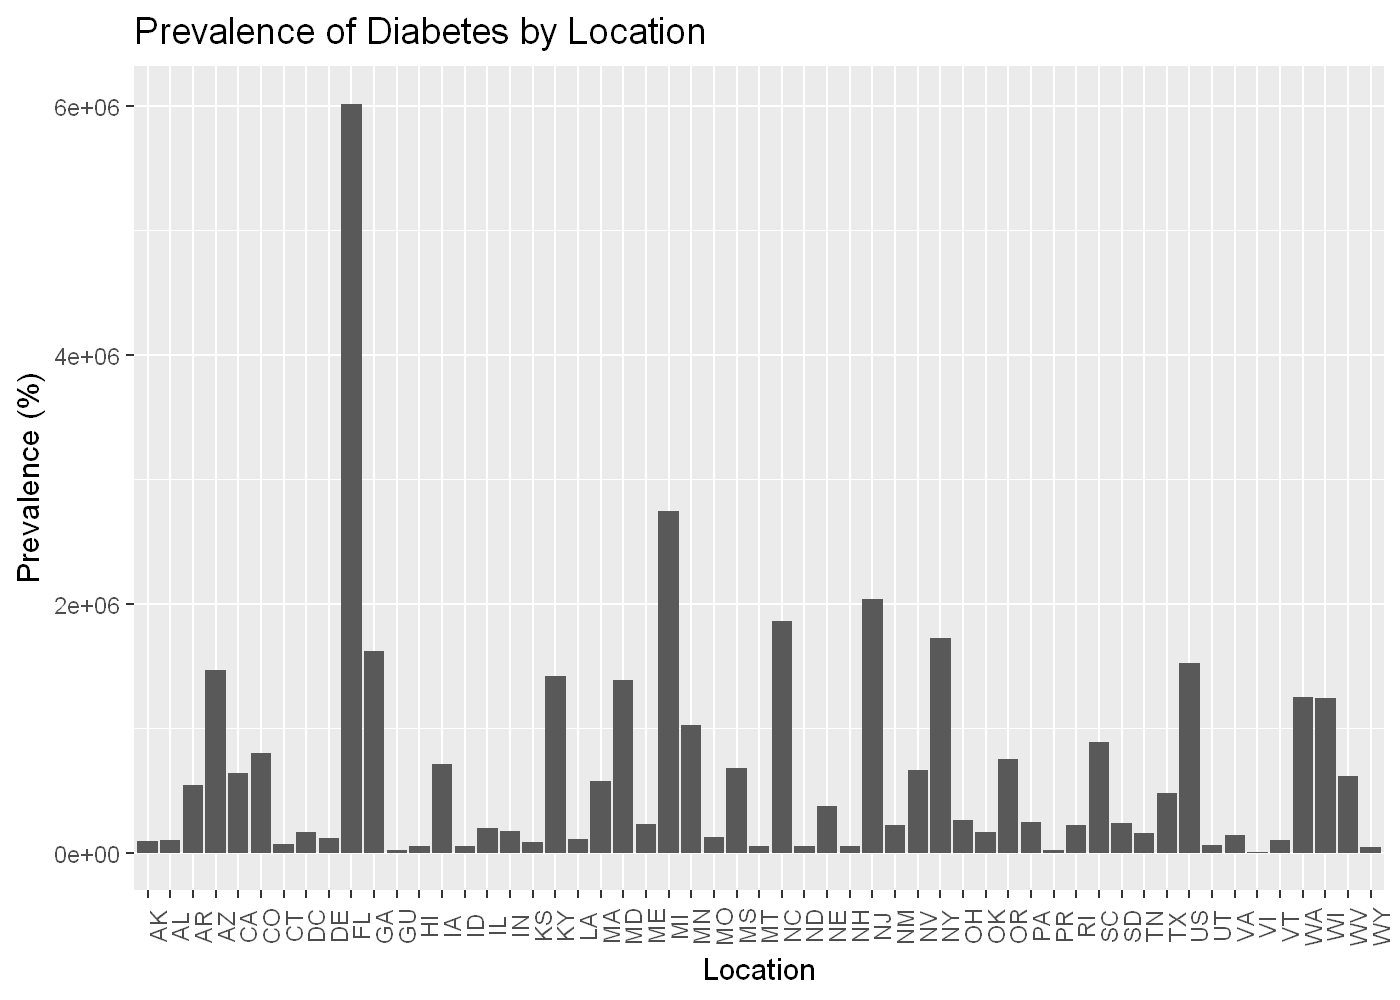

In [36]:
ggplot(data_clean, aes(x = LocationAbbr, y = DataValueNum)) +
  geom_col() +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title = "Prevalence of Diabetes by Location", y = "Prevalence (%)", x = "Location")

6. Boxplot diagram

   - čiara - medián
   - box - medzikvartilové rozpätie - obsahuje 50% hodnôt
   - hranice - minimum, maximum

In [37]:
subdata_questions <- select(data_clean, Question, QuestionID)

View(unique(subdata_questions))

,Question,QuestionID
,<fct>,<fct>
1,Visits to dentist or dental clinic among adults aged >= 18 years with diagnosed diabetes,DIA8_0
2,Prevalence of diagnosed diabetes among adults aged >= 18 years,DIA2_1
3,Prevalence of high cholesterol among adults aged >= 18 years with diagnosed diabetes,DIA11_1
4,Influenza vaccination among noninstitutionalized adults aged 18-64 years with diagnosed diabetes,DIA12_1
5,Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with diagnosed diabetes,DIA13_1
6,Prevalence of depressive disorders among adults aged >= 18 years with diagnosed diabetes,DIA11_3
10,Mortality due to diabetes reported as any listed cause of death,DIA1_1
46,Mortality with diabetic ketoacidosis reported as any listed cause of death,DIA1_2
77,Amputation of a lower extremity attributable to diabetes,DIA4_0


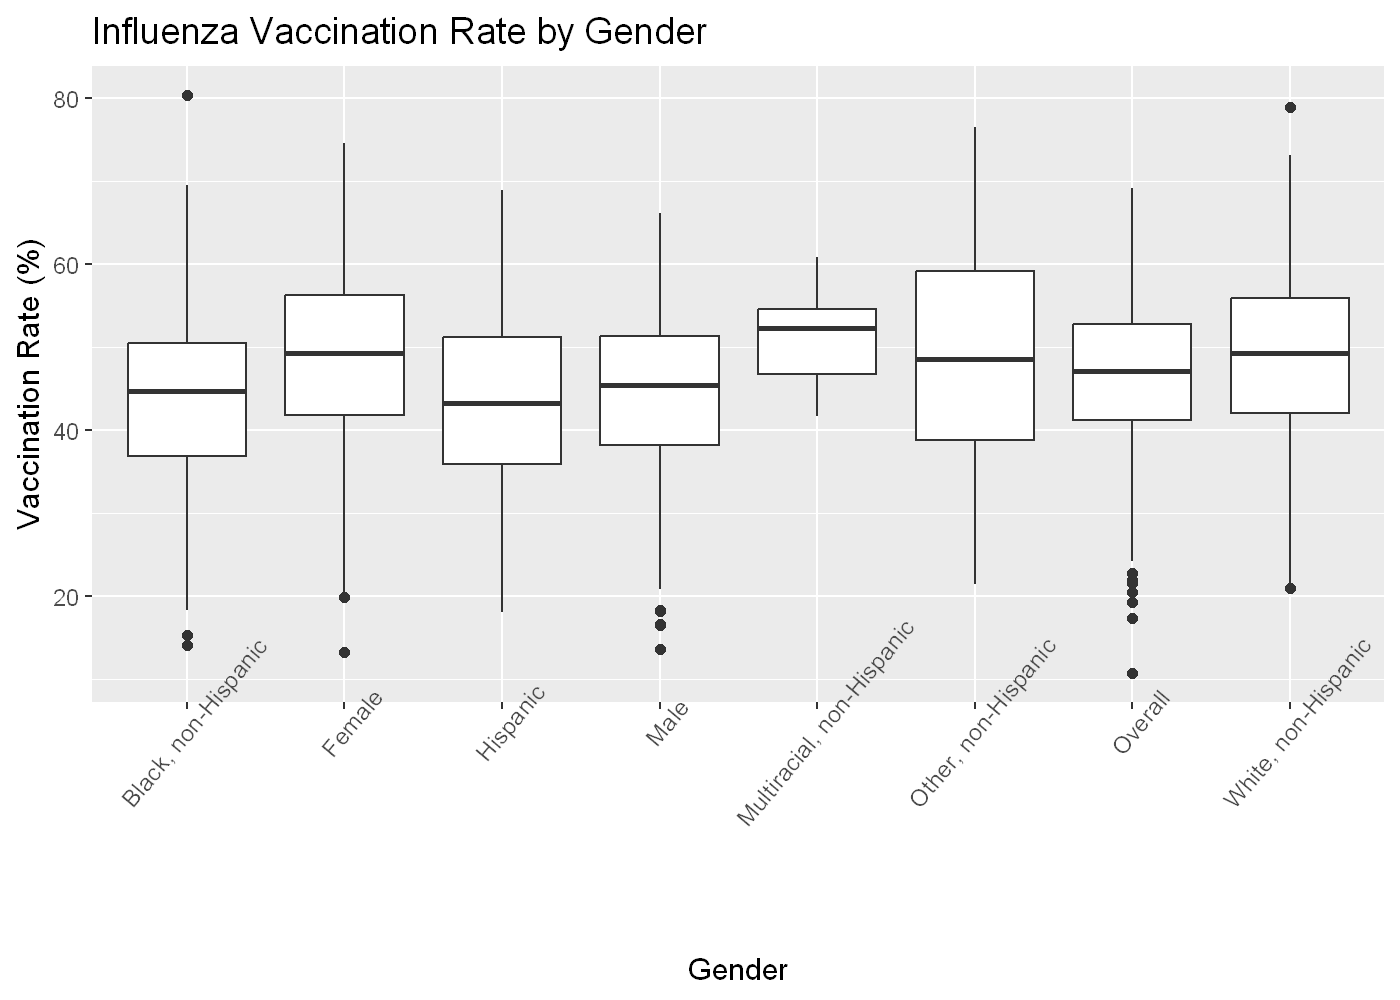

In [38]:
# influenza Vaccination Rate by Gender (question DIA12_1)
# Influenza vaccination among noninstitutionalized adults aged 18-64 years with diagnosed diabetes
vaccination_data <- data_clean %>% 
  filter(QuestionID == "DIA12_1") %>%
  mutate(Stratification1 = as.factor(Stratification1)) # ensure Stratification1 is a factor

ggplot(vaccination_data, aes(x = Stratification1, y = DataValueNum)) +
  geom_boxplot() +
  theme(axis.text.x = element_text(angle = 50)) +
  labs(title = "Influenza Vaccination Rate by Gender", y = "Vaccination Rate (%)", x = "Gender")


Pozorovania:

- Medián zaočkovanosti je vo všetkých skupinách v intervale 40-60 %.
- Medzikvartilové rozpätie (IQR - box) je vo väčšine skupín podobné, čo naznačuje konzistentné rozloženie údajov okolo mediánu.
- Najmenšia vaeriabilita je v skupine "Multiracial, non-Hispanic".
- V niekoľkých skupinách sa vyskytujú odľahlé hodnoty, najmä v skupinách "Black, non-Hispanic, Male a Overall", čo poukazuje na niektoré osoby s výrazne nižšou mierou zaočkovanosti.